# Viagem do zezinho

Este trabalho tem como objetivo descrever alguns problemas que o Zezinho teve em sua viagem e a partir dos algoritmos estudados podemos ajudá-lo.

Os problemas da viagem são os seguintes:

- Achar o menor caminho para o seu destino, utilizando o algoritmo de Dijkstra;
- Guardar seus brinquedos no cofre do hotel, onde ele tem uma capacidade especifica, seus brinquedos tem tamanhos específicos e o valor sentimental de cada um deles (Knapsack - PD);
- Verificar quais são as atrações turísticas mais próximas (Par de pontos mais próximos - Greedy). 

### 1º - Menor caminho entre a fonte e seu destino

Zezinho e sua família querem viajar para alguma capital do Brasil. A ideia é encontrar o menor caminho entre a fonte e o destino final (que eles ainda não sabem).

In [200]:
!pip install networkx
!pip install matplotlib
!pip install ipywidgets
!pip install scipy
!pip install numpy

import networkx as nx
from networkx.generators.random_graphs import erdos_renyi_graph

import matplotlib.pyplot as plt

import random

import ipywidgets as widgets

import numpy as np

import math
import copy

Vamos simular abaixo as capitais dos estados do Brasil e randomizar o peso das estradas

In [201]:
capitais = ["São Paulo","Rio de Janeiro","Belo Horizonte","Salvador","Fortaleza","Curitiba","Manaus","Recife","Belém","Porto Alegre","Goiânia","São Luís","Maceió","Campo Grande","Natal","Teresina","João Pessoa","Aracaju","Cuiabá","Florianópolis","Macapá","Porto Velho","Rio Branco","Vitória","Boa Vista","Palmas"]

O código abaixo vai gerar um grafo randomizado de Erdos Renyi simulando as estradas entre as capitais

In [202]:
n = 26
p = 0.13
g = erdos_renyi_graph(n, p, seed=123)

Agora definimos as labels de cada nó com os seus respectivos nomes

In [203]:
mapas_capitais = {k:v for k,v in zip(range(0,len(capitais)),capitais)}

g_capitais = nx.relabel_nodes(g,mapas_capitais)

Utilizando a biblioteca random, vamos definir pesos positivos entre 1 a 10 para cada aresta

In [204]:
for (u, v) in g_capitais.edges():
    g_capitais.edges[u,v]['weight'] = random.randint(0,10)

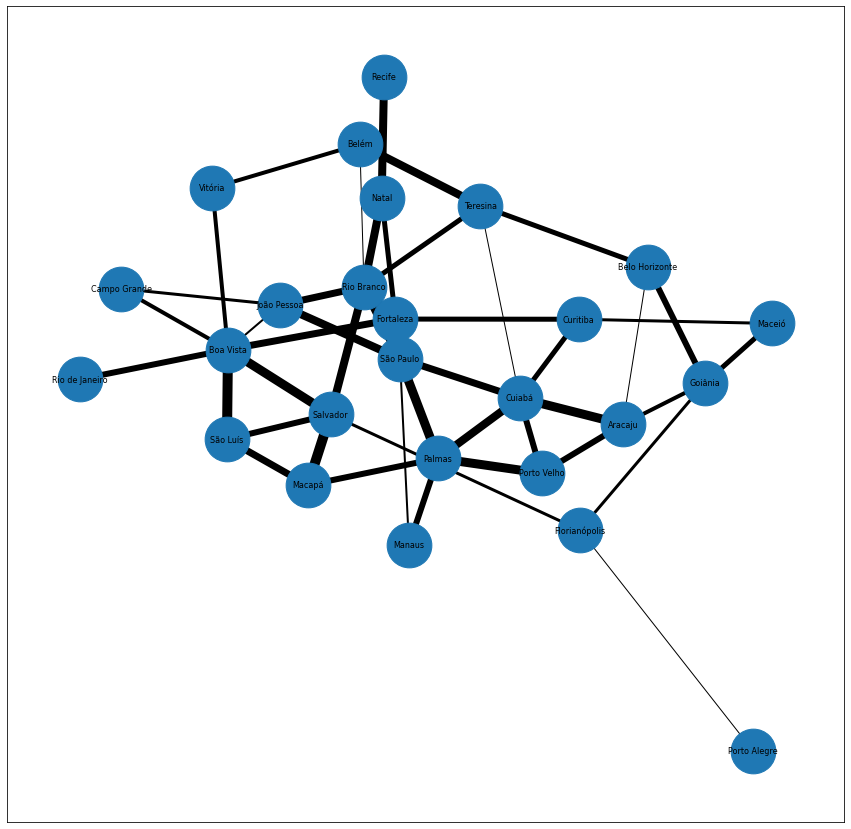

In [205]:
fig,ax = plt.subplots(figsize =(15,15))

pos = nx.spring_layout(g_capitais, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(g_capitais, pos, node_size=2000, ax=ax)

pesos = [d["weight"] for (u, v, d) in g_capitais.edges(data=True)]

#edges
nx.draw_networkx_edges(g_capitais, pos, width=pesos, ax=ax)

#labels
nx.draw_networkx_labels(g_capitais, pos, font_size=8, ax=ax)

plt.show()

In [206]:
[(v,i) for i,v in enumerate(capitais)]

[('São Paulo', 0),
 ('Rio de Janeiro', 1),
 ('Belo Horizonte', 2),
 ('Salvador', 3),
 ('Fortaleza', 4),
 ('Curitiba', 5),
 ('Manaus', 6),
 ('Recife', 7),
 ('Belém', 8),
 ('Porto Alegre', 9),
 ('Goiânia', 10),
 ('São Luís', 11),
 ('Maceió', 12),
 ('Campo Grande', 13),
 ('Natal', 14),
 ('Teresina', 15),
 ('João Pessoa', 16),
 ('Aracaju', 17),
 ('Cuiabá', 18),
 ('Florianópolis', 19),
 ('Macapá', 20),
 ('Porto Velho', 21),
 ('Rio Branco', 22),
 ('Vitória', 23),
 ('Boa Vista', 24),
 ('Palmas', 25)]

In [207]:
origem = widgets.Dropdown(
    options=[(v,i) for i,v in enumerate(capitais)],
    value=2,
    description='Origem:',
)

destino = widgets.Dropdown(
    options=[(v,i) for i,v in enumerate(capitais)],
    value=5,
    description='Destino:',
)

In [208]:
display(origem)
display(destino)

Dropdown(description='Origem:', index=2, options=(('São Paulo', 0), ('Rio de Janeiro', 1), ('Belo Horizonte', …

Dropdown(description='Destino:', index=5, options=(('São Paulo', 0), ('Rio de Janeiro', 1), ('Belo Horizonte',…

Agora, o próximo passo é utilizar o algoritmo de Dijkstra pra encontrar o menor caminho entre uma fonte e um destino.

In [209]:
def minDistance(dist,queue):

    minimo = float("Inf")
    min_index = -1

    for i in range(len(dist)):
        if dist[i] < minimo and i in queue:
            minimo = dist[i]
            min_index = i
    return min_index

In [210]:
def listaCaminho(parent, j):
    caminho = []
    while(j!=-1):
        caminho.append(mapas_capitais[j])
        j = parent[j]
        
    caminho.reverse()
    return caminho

In [211]:
def callback_caminho(dist, parent, src, destino):

    h = 0
    for i in range(1, len(dist)):
        
        if i == destino:
            h = 1
            return (listaCaminho(parent,i),dist[i])
    
    if h == 0:
        return -1,-1

In [212]:
def dijkstra(grafo, fonte, destino):

    linha = len(grafo)
    coluna = len(grafo[0])

    dist = [float("Inf")] * linha
    parent = [-1] * linha
    dist[fonte] = 0
    queue = []

    for i in range(linha):
        queue.append(i)

    while queue:

        u = minDistance(dist,queue)
        queue.remove(u)

        for i in range(coluna):
            if grafo[u][i] and i in queue:
                if dist[u] + grafo[u][i] < dist[i]:
                    dist[i] = dist[u] + grafo[u][i]
                    parent[i] = u

    return callback_caminho(dist,parent, fonte, destino)

Certo!

Com o algoritmo implementado, faremos a transformação do dicionário para a matriz de adjacências.

In [213]:
g_m = nx.adjacency_matrix(nx.Graph(g_capitais)).todense().tolist()

C:\Users\gabri\AppData\Local\Temp\ipykernel_3612\421575305.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  g_m = nx.adjacency_matrix(nx.Graph(g_capitais)).todense().tolist()


Finalmente, obtemos o peso do menor caminho e o próprio caminho que a família percorreu.

In [214]:
caminho,peso = dijkstra(g_m, origem.value, destino.value)

print(f'Peso do caminho: {peso}')
print(f'Caminho:',' -> '.join(caminho))

Peso do caminho: 11
Caminho: Belo Horizonte -> Teresina -> Cuiabá -> Curitiba


### 2° - Guardar seus brinquedos no cofre do hotel

Depois de algumas horas de viagem, a família do Zezinho finalmente chega ao hotel. 

A mãe do Zezinho fala pra ele que eles só iriam pra piscina quando o Zezinho terminasse de guardar seus brinquedos, que estavam na mochila.

Ele não quer que todo mundo tenha fácil acesso aos brinquedos dele no armário, então ele quer guardar aqueles que ele tem mais valor sentimental no cofre.

#### Utilizaremos a solução do KnapSack para resolvermos a solução. 

Primeiro criamos uma lista de brinquedos que o Zezinho levou pra viagem.

In [215]:
brinquedos = ["trem",
            "rodinho",
            "pula-pirata",
            "varetinha",
            "dinossauro",
            "pop-it",
            "bola",
            "ursinho",
            "patinho",
            "avião",
            "giz de cera",
            "carrinho de controle-remoto",
            "dominó",
            "lego",
            "max steel",
            "hot wheels",
            "uno",
            "Nintendo Switch",
            "nerf",
            "beyblade"]

Cada brinquedo possui um valor sentimental pra ele (representado pela lista 'valor_sent') e um peso, em gramas (representado pela lista 'peso'). 

Acontece que o cofre possui um peso máximo (representado pela variável 'peso_max') — logo, pode não haver a possiblidade de colocar todos os brinquedos lá dentro, apesar do cofre ser bem grande.

'valor_sent', 'peso', e 'peso_max' receberão valores aleatórios.



In [216]:
valor_sent = []
peso = []

peso_max = random.randrange (50,300)

for i in range (len(brinquedos)):
    x = random.randrange(1,1000)
    y = random.randrange(1,200)
    valor_sent.append(x)
    peso.append(y)

In [217]:
for i in range (len(brinquedos)):
    print(f'Nome: {brinquedos[i]} \t Valor sentimental: {valor_sent[i]} \t Peso: {peso[i]}g')


Nome: trem 	 Valor sentimental: 299 	 Peso: 177g
Nome: rodinho 	 Valor sentimental: 326 	 Peso: 141g
Nome: pula-pirata 	 Valor sentimental: 487 	 Peso: 194g
Nome: varetinha 	 Valor sentimental: 849 	 Peso: 21g
Nome: dinossauro 	 Valor sentimental: 561 	 Peso: 117g
Nome: pop-it 	 Valor sentimental: 504 	 Peso: 77g
Nome: bola 	 Valor sentimental: 884 	 Peso: 136g
Nome: ursinho 	 Valor sentimental: 422 	 Peso: 89g
Nome: patinho 	 Valor sentimental: 786 	 Peso: 53g
Nome: avião 	 Valor sentimental: 460 	 Peso: 46g
Nome: giz de cera 	 Valor sentimental: 919 	 Peso: 36g
Nome: carrinho de controle-remoto 	 Valor sentimental: 381 	 Peso: 19g
Nome: dominó 	 Valor sentimental: 996 	 Peso: 41g
Nome: lego 	 Valor sentimental: 146 	 Peso: 80g
Nome: max steel 	 Valor sentimental: 209 	 Peso: 32g
Nome: hot wheels 	 Valor sentimental: 33 	 Peso: 20g
Nome: uno 	 Valor sentimental: 851 	 Peso: 83g
Nome: Nintendo Switch 	 Valor sentimental: 397 	 Peso: 60g
Nome: nerf 	 Valor sentimental: 724 	 Peso: 12g
N

In [218]:
print('O peso máximo é: ', peso_max)

O peso máximo é:  148


Agora utilizamos a função do knapSack.

In [219]:
def knapSack(peso_max, peso, valor_sent, n):
    K = [[0 for _ in range(peso_max + 1)] for _ in range(n + 1)]

    for i in range(n + 1):

        for w in range(0, peso_max + 1):

            if i == 0 or w == 0:
                K[i][w] = 0
            elif peso[i-1] <= w:
                K[i][w] = max(valor_sent[i-1] + K[i-1][w-peso[i-1]], K[i-1][w])

            else:
                K[i][w] = K[i-1][w]

    return K[n][peso_max]

x = knapSack(peso_max, peso, valor_sent, len(brinquedos))
print(f'{x} é a soma dos valores sentimentais dos brinquedos que podem ser colocado no cofre.')

3869 é a soma dos valores sentimentais dos brinquedos que podem ser colocado no cofre.


### 3° - Verificar quais são as atrações turísticas mais próximas

Os dias foram passando e a família só quis saber de ficar na piscina do Hotel.

No último dia, eles perceberam que não visitaram nenhum ponto turístico da cidade!

Faltam poucas horas pra ir pro aeroporto e o pai do Zezinho teve um ideia: e se eles visitassem só 2 atrações turísticas? 

A missão é descobrir quais são as 2 atrações mais próximas uma da outra pra economizar tempo e eles não perderem o voo. 

Para isso, utilizaremos a lógica do 'par de pontos mais próximos'.

Abaixo criamos uma lista de possíveis atrações

In [220]:
atracoes = ["parque","cinema","igrejinha","lagoa","centro","teatro","praça","clube","museu","balada","restaurante"]

Criamos a classe para armazenar todas as informações de uma atração turistica

In [221]:
class atracao():
    def __init__(self, x, y, ind, nome):
        self.x = x
        self.y = y
        self.ind = ind
        self.nome = nome

Geramos os pontos turisticos de maneira aleatória a aprtir da biblioteca numpy e random

In [222]:
def gerar_pontos_turisticos(quantidade, dimensao):
    pontos = np.random.uniform(0, dimensao, size=(quantidade,2))
    pontos_turistico = []
    for i in range(quantidade):
        pontos_turistico.append(atracao(pontos[i][0], pontos[i][1], i, random.choice(atracoes)+" "+str(i)))
    return pontos_turistico

In [223]:
pontos_turisticos = gerar_pontos_turisticos(60,40)
for i in range(len(pontos_turisticos)):
    ponto = pontos_turisticos[i]
    print(f"Nome: {ponto.nome}, Coordenada: ({ponto.x}, {ponto.y})")

Nome: museu 0, Coordenada: (9.290441457562846, 25.282895685654907)
Nome: museu 1, Coordenada: (21.86199223977595, 5.858854424053099)
Nome: igrejinha 2, Coordenada: (26.68193941716154, 2.3829798743635644)
Nome: lagoa 3, Coordenada: (32.23098639218606, 25.579702290463647)
Nome: igrejinha 4, Coordenada: (31.453919397240927, 20.26973685871451)
Nome: igrejinha 5, Coordenada: (29.579012559051932, 31.163097974499678)
Nome: restaurante 6, Coordenada: (38.27176718479185, 27.07498943350199)
Nome: balada 7, Coordenada: (39.36281311878035, 39.362156452058144)
Nome: igrejinha 8, Coordenada: (7.1048573111349045, 4.394473602560729)
Nome: museu 9, Coordenada: (36.552623466095305, 2.004024990660933)
Nome: lagoa 10, Coordenada: (34.93215712576287, 23.029512265333288)
Nome: igrejinha 11, Coordenada: (20.583770756442846, 28.50925225562149)
Nome: parque 12, Coordenada: (31.680624078534937, 38.11463298787549)
Nome: teatro 13, Coordenada: (11.632844109095096, 34.54768604276407)
Nome: igrejinha 14, Coordenada

Os pontos turisticos da cidade são os plotados abaixo

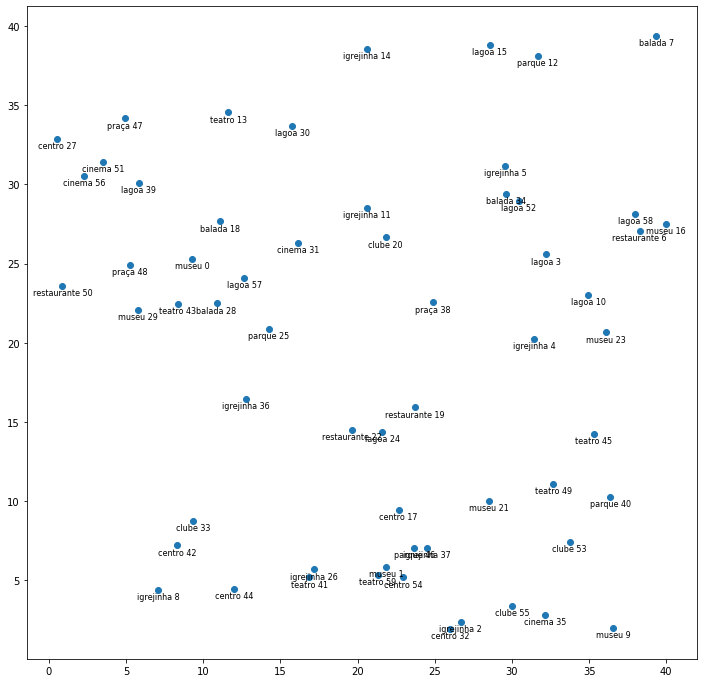

In [224]:
pontos_eixo_x = [ponto.x for ponto in pontos_turisticos]
pontos_eixo_y = [ponto.y for ponto in pontos_turisticos]
nomes_atracoes = [ponto.nome for ponto in pontos_turisticos]

fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(pontos_eixo_x,pontos_eixo_y)

for i,name in enumerate(nomes_atracoes):
    ax.annotate(name,(pontos_eixo_x[i],pontos_eixo_y[i]-0.6),fontsize=8,ha='center')

plt.show()

In [225]:
ans,indi,indj = float('inf'),0,0

Agora vamos utilizar o algoritmo de para encontrar o par de pontos mais próximos utilizando a estratégia de dividir e conquistar

In [226]:
# Função para encontrar a distância entre 2 pontos

def dist(p1, p2):
    return math.sqrt((p1.x - p2.x)**2 +
                     (p1.y - p2.y)**2)
 

# Método para retornar a menor distância entre 2 pontos

def forca_bruta(P, n):
    min_val = float('inf')
    for i in range(n):
        for j in range(i + 1, n):
            if dist(P[i], P[j]) < min_val:
                min_val = dist(P[i], P[j])
                global ans,indi,indj
                if(min_val<ans):
                  ans = min_val
                  indi = P[i]
                  indj = P[j]
 
    return min_val
 
# Função para encontrar a distância entre os pontos mais próximos. Todos os pontos em parte []
# estão ordenados de acordo com o coordenada y. Esse método tem complexidade O(n), já que o loop
# roda no máximo 6 vezes.

def parte_proximos(parte, tamanho, d):
     
    # Iniciando a distância mínima como d
    min_val = d
 

    # Pegamos todos os pontos, um por um, e tentamos como os próximos pontos até 
    # que a diferença entre as coordenadas Y seja menor que d.
    # Isso prova que vai rodar no máximo 6 vezes.

    for i in range(tamanho):
        j = i + 1
        while j < tamanho and (parte[j].y -
                            parte[i].y) < min_val:
            min_val = dist(parte[i], parte[j])
            global ans,indi,indj
            if(min_val<ans):
              ans = min_val
              indi = parte[i]
              indj = parte[j]
            j += 1
 
    return min_val

# Função recursiva para encontrar a menor distância. O vetor p
# contém todos os pontos ordenados de acordo com o eixo X.

def proximos_util(P, Q, n):
     
    # Caso haja 2 ou 3 pontos, usamos a função forca_bruta.
    if n <= 3:
        return forca_bruta(P, n)
 
    # Encontrar o ponto do meio.
    mid = n // 2
    meio_ponto = P[mid]
 
    # Fazemos isso só para manter uma "cópia" das partes da esquerda e da direita.
    Pl = P[:mid]
    Pr = P[mid:]
 
    # Consideramos a linha vertical passando pelo ponto do meio e calculamos
    # a menor distância na esquerda (dl) do ponto do meio e a manor na direita (dr)
    dl = proximos_util(Pl, Q, mid)
    dr = proximos_util(Pr, Q, n - mid)
 
    # Encontramos o menor entre 2 distâncias.
    d = min(dl, dr)

    # Fazemos um array que contém alguns pontos próximos a linha
    # que passa pelo ponto médio.
    parteP = []
    parteQ = []
    lr = Pl + Pr
    for i in range(n):
        if abs(lr[i].x - meio_ponto.x) < d:
            parteP.append(lr[i])
        if abs(Q[i].x - meio_ponto.x) < d:
            parteQ.append(Q[i])
 
    parteP.sort(key = lambda point: point.y) # Fazemos a ordenação pelo eixo Y.
    min_a = min(d, parte_proximos(parteP, len(parteP), d))
    min_b = min(d, parte_proximos(parteQ, len(parteQ), d))
     
    # Encontramos os pontos mais próximos no array parte[].
    # Retorna o mínimo de d e o self.closest.
    return min(min_a,min_b)

# Main
def proximos(P, n):
    global ans,indi,indj
    ans,indi,indj = float('inf'),0,0
    P.sort(key = lambda point: point.x)
    Q = copy.deepcopy(P)
    Q.sort(key = lambda point: point.y)   

    # Usamos a função recursiva já mencionada pra encontrar a menor distância.
    return proximos_util(P, Q, n)

In [227]:
d = proximos(pontos_turisticos, len(pontos_turisticos))
i = indi
j = indj

In [228]:
print(f"Os pontos turísticos mais próximos são o/a {i.nome} e o/a {j.nome}, a distância é de {round(d,2)} km")

Os pontos turísticos mais próximos são o/a teatro 41 e o/a igrejinha 26, a distância é de 0.59 km


##### Oba! 

##### Após visitarem os dois pontos turísticos mais próximos, 
##### Zezinho e sua família poderá retornar para casa após uma ótima viagem!